---------------------------------------------------

<h1 style="text-align: center;" markdown="1">Big Data, Big Problems–Parallelizing Kmeans</h1>

-----------

<center> **Reuben McCreanor and Emily (Wei) Shao** <center>

<h3 style="text-align: center;" markdown="1">Abstract</h3>

K-means is a data-partitioning algorithm that separates n observations into k partitions. Due to its simplicity of implementation, its easy interpretability, and its ability to categorize data based on desired features, it remains one of the most popular algorithms in fields of statistics and machine learning. However, the key issue with k-means comes from its efficiency and scalability. As the size of datasets continues to increase, implementing k-means on data of any magnitude becomes computationally infeasible. A recently proposed variation of k-means, k-means++, provides a robust method of selecting the initial centers, essentially giving an optimal solution. However, due to the number of passes over the data required in a naive implementation, even clusters a million data points into 100 partitions would be exceedingly slow. In order to combat this, a parallelized version of k-means++ is proposed, k-means $||$. This version uses a sampling factor $\ell$ to dramatically reduce the number of passes while still arriving at an equivalent solution of partitions. This paper will implement k-means++ and k-means$||$ in both sequential and parallel setting and compare the results both in terms of efficiency and equivalency of partition arrangements.

### 1 Introduction

In general, clustering is a means of grouping observations into a set such that the other observations in this set are more similar to each other than to those in other sets. Starting with a data set, we use the use the k-means algorithm to define which observations are most similar to each other, and thus categorize these n observations into k distinct groups.

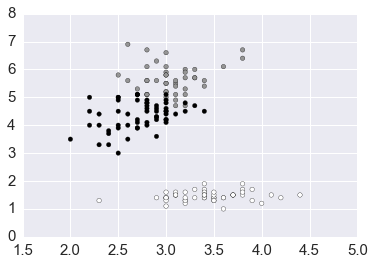

In [11]:
fig

In the example above, we can data can be clustered into three partitions based on the similarity between observations. In industry, a common application of clusters is in market segmentation. Taking the example of a retailer, k-means clustering can be used as a means to understand their total addressable market. Given that there total market is comprised of people from many different incomes, locations, and type of consumers, clustering allows them to understand which groups are most similar based on these attributes and thus designing targeted marketing campaigns for each distinct group.

With these kinds of applications, k-means is both a useful and wide-reaching algorithm, however, there are two key issues with its implementation. In general, the k-means algorithm works by taking some initial centroid locations, often done by picking points at random from that data set. Each observation is then assignment the closest centroid and then the centroids are recomputed by calculating the mean of the observations assigned to it. This process is repeated until the algorithm converges, which is often measured define as none of observations changing cluster assignments within an iteration.

The key issue with this process is that the overall clustering assignment is heavily dependent on the initial centroids. Given that the k-means algorithm often gets stuck in local minima, it does not make sense to simply randomly pick the initial centroids. K-mean++ provides a solution to this problem by selecting centroids at the beginning of the process that approximate the optimal solution. 

In terms of the quality and consistency of the clustering arrangements, k-means++ is a remarkable solution. However, because the process involves looping through multiple centroid configurations in order to find the optimal one, this solution is not scalable for large data sets. To solve this problem, the k-means$||$ algorithm uses a sampling factor $\ell$ to dramatically reduce the number of passes while still arriving at an equivalent solution. The k-means$||$ algorithm is able to obtain a close to optimal solution after a logarithmic number of passes. This dramatically increases the efficiency of the algorithm and allows us to implement an optimal version of k-means clustering even of large data sets.

### 2 K-means++

#### 2.1 Overview

The k-means++ algorithm addresses the problem of subompital clustering arrangements by creating a procedure with which to select the inital cluster centers.  With the k-means++ initialization, we are guaranteed to find a solution that is $O(\log k)$ competitive to the optimal k-means solution.

In k-means++, the centers are first chosen uniformly at random from the observations. Then, each subsequent cluster center is chosen from the remaining data points with probability proportional to its squared distance from the point's closest existing cluster center. The intuition behind this approach is that spreading out the k initial cluster centers is a good thing, and this approach allows us to choose inital center points that are not only consistent, but approximate the optimal solution. After this point we can then proceed with the standard approach for k-means clustering.

#### 2.2 Pseudo code

Step 1: Choose 

#### 2.3 Implementation

### 3 K-means$||$

#### 3.1 Overview

While k-means++ provides an approximately optimal soltion, it also needs k passes over the data and thus is not scalable to large data sets. To address this problem, k-means$||$ is a parallel version for initializing the centers for the k-means clustering method. 

The k-means$||$ algorithm is intuitively similar to k-means++ except that it uses of an oversampling factor $l = \Omega(k)$, and some linear function of $k$. By instead using k-means$||$, we are able to obtain a nearly optimal solution after only a logarithmic number of passes. In  k-means$||$, we sample a point uniformly at random from our oservations as an initial center and compute the cost of this clustering center. 

At each iteration, we then sample each observation in the data set with some probability, and update the given cluster se by adding the sampled points. According to the sampling probability, the expected number of points sampled in each iteration is $l$. Thus, finally the expected number of points we sampled is $l$log$\psi$, which will be greater than k. Thus, finally, we reduce the number of centers and assign weights to the points in the current cluster according to the number of observations which are closer to the given center than any other center.

#### 3.2 Pseudo code

#### 3.3 Implementation

### 4 Testing

#### 4.1 Function 1

ADD TEXT HERE

### 5 Optimization

#### 5.1 Numba

ADD TEXT HERE

#### 5.2 Cython

ADD TEXT HERE

#### 5.3 Parallelization

ADD TEXT HERE

#### 5.4 Comparsions of Efficiency

ADD TEXT HERE

### 6 Data

#### 6.1 Data simulation

To generate the dataset,
we sampled k centers from a 15-dimensional spherical Gaussian
distribution with mean at the origin and variance R ∈
{1, 10, 100}. We then added points from Gaussian distributions
of unit variance around each center. Given the k centers,
this is a mixture of k spherical Gaussians with equal
weights. Note that the Gaussians are separated in terms
of probability mass — even if only marginally for the case
R = 1 — and therefore the value of the optimal k-clustering
can be well approximated using the centers of these Gaussians.
The number of sampled points from this mixture of
Gaussians is n = 10, 000.

#### 6.2 Real world data

ADD TEXT HERE

### 7 Results

ADD TEXT HERE

### 7 Conclusions

### Appendix

#### Code for visualizations

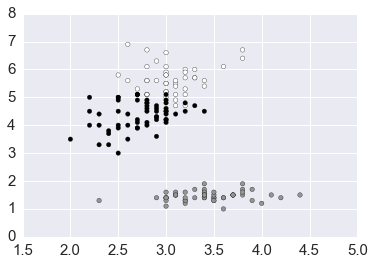

In [12]:
from sklearn import cluster
from matplotlib import pyplot
import numpy as np

# load iris data and exclude species column
iris = sns.load_dataset("iris").ix[:, 0:3]
# set number of clusters #
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(iris)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
from matplotlib import pyplot
import numpy as np

from matplotlib import pyplot
import numpy as np
plt.scatter(iris.ix[:,1], iris.ix[:,2], c=labels)
fig = plt.gcf()